In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

import torch
from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as transforms

# Make Pickle

In [12]:
for mode in ['train', 'validation']:
    for version in ['A2C', 'A4C']:
        X_list = []
        y_list = []

        PATH = f'data/resize_crop/{mode}/{version}'
        img_list = sorted(os.listdir(f'{PATH}/img/'))

        for img_name in img_list:
            img = plt.imread(f'{PATH}/img/{img_name}')
            mask = np.load(f'{PATH}/mask/{img_name[:-4]}.npy')

            X_list.append(img[:, :, :3])
            y_list.append(mask)

        with open(f'data/{mode}_{version}.pickle', 'wb') as f:
            pickle.dump([np.array(X_list), np.array(y_list)], f)

In [13]:
for mode in ['train', 'validation']:
    for version in ['A2C', 'A4C']:
        with open(f'data/{mode}_{version}.pickle', 'rb') as f:
            data = pickle.load(f)

        print(data[0].shape, data[1].shape)

(800, 400, 400, 3) (800, 400, 400, 1)
(800, 400, 400, 3) (800, 400, 400, 1)
(100, 400, 400, 3) (100, 400, 400, 1)
(100, 400, 400, 3) (100, 400, 400, 1)


# Make DataLoader

In [24]:
class CustomDataset(Dataset):
    def __init__(self, mode, version, transform=False):
        with open(f'data/{mode}_{version}.pickle', 'rb') as f:
            X, y = pickle.load(f)
        
        self.X = X
        self.y = y

        self.transform = transform
        
    def __getitem__(self, index):
        img, mask = self.X[index], self.y[index]

        if self.transform:
            img = self.transform(img)
            mask = self.transform(mask)

        return img, mask

    def __len__(self):
        return len(self.X)

In [26]:
train_2_dataset = CustomDataset('train', 'A2C')
train_4_dataset = CustomDataset('train', 'A4C')
val_2_dataset = CustomDataset('validation', 'A2C')
val_4_dataset = CustomDataset('validation', 'A4C')

In [27]:
train_2_dataloader = DataLoader(train_2_dataset, batch_size=40, shuffle=False)
train_4_dataloader = DataLoader(train_2_dataset, batch_size=40, shuffle=False)
val_2_dataloader = DataLoader(val_2_dataset, batch_size=40, shuffle=False)
val_4_dataloader = DataLoader(val_4_dataset, batch_size=40, shuffle=False)

In [28]:
for (img, mask) in train_2_dataloader:
    print(img.shape)
    print(mask.shape)

torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size([40, 400, 400, 1])
torch.Size([40, 400, 400, 3])
torch.Size

# Augmentation

In [14]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import cv2
import torch

import albumentations as A
from albumentations.pytorch import ToTensorV2

from make_dataloader import make_dataloader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


tensor(0.9843) tensor(0.)
tensor(1.0000) tensor(0.)
torch.Size([3, 3, 400, 400]) torch.Size([3, 1, 400, 400])


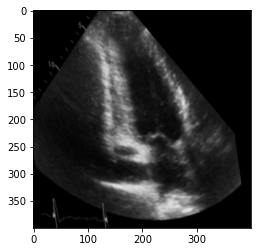

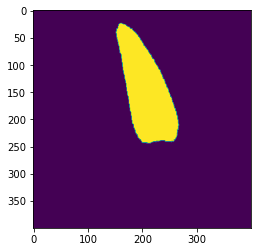

In [16]:
transform = A.Compose([
    A.HorizontalFlip(),
    # A.ElasticTransform(border_mode=cv2.BORDER_CONSTANT),
    ToTensorV2(transpose_mask=True)
])

train_loader = make_dataloader('train', 'A2C', 3, transform=transform)

origin_img, origin_mask = next(iter(train_loader))

print(torch.max(origin_img), torch.min(origin_img))
print(torch.max(origin_mask), torch.min(origin_mask))

print(origin_img.size(), origin_mask.size())

plt.imshow(origin_img[0].numpy().transpose(1,2,0))
plt.show()
plt.imshow(origin_mask[0].numpy().transpose(1,2,0))
plt.show()